In [50]:
import pandas as pd 
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from scipy import stats

import acquire
import prepare

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

# Acquiring data

In [2]:
df = prepare.get_data()

In [3]:
df.head()

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code,precipitation,snowfall,snow_depth,avg_temp,max_temp,min_temp,foggy,heavy_fog,thunder,hail,blowing_snow,rain,precipitation_rolling_7,precipitation_rolling_14,precipitation_rolling_30,avg_temp_rolling_7,avg_temp_rolling_14,avg_temp_rolling_30,max_temp_rolling_7,max_temp_rolling_14,max_temp_rolling_30,min_temp_rolling_7,min_temp_rolling_14,min_temp_rolling_30
0,6582,2019-03-10,3200,THOUSAND OAKS DR,2100,2100.0,2019-03-10 13:16:00,2019-03-10 14:40:00,1.400000,Grease,Spill ContainedReturned to SystemArea Cleaned ...,CLEANED MAIN,SALADO CREEK,66918,66917,STREET,None,NaN,3,2019,11,0.0,8.0,16.55,PVC,1997.0,NaN,NaN,3200 THOUSAND OAKS DR,1,1.0,0,GRAVITY,Sewer Main,NaN,27.0,2019-03-10 13:43:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","3200 THOUSAND OAKS DR,SAN ANTONIO,Texas,USA","3200, Thousand Oaks Drive, Horseshoe Bend, Los...",78746,0.00,0.0,0.0,69.0,79,60,1,1,0,0,0,0,0.004286,0.005714,0.016333,54.285714,55.285714,54.2,65.857143,65.714286,64.533333,46.000000,47.642857,45.900000
1,6583,2019-03-10,6804,S FLORES ST,80,0.0,2019-03-10 14:25:00,2019-03-10 15:45:00,1.333333,Grease,Spill ContainedArea Cleaned and Disinfected,CLEANED MAIN,DOS RIOS,24250,24193,STORMDRAIN,None,3.0,3,2019,11,0.0,8.0,157.00,PVC,1988.0,NaN,NaN,6804 S FLORES,1,1.0,0,GRAVITY,Sewer Main,NaN,65.0,2019-03-10 15:30:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","6804 S FLORES,SAN ANTONIO,Texas,USA","Flores, West Odessa, Ector County, Texas, Unit...",Texas,0.00,0.0,0.0,69.0,79,60,1,1,0,0,0,0,0.004286,0.005714,0.016333,54.285714,55.285714,54.2,65.857143,65.714286,64.533333,46.000000,47.642857,45.900000
2,6581,2019-03-09,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,2822,3351,ALLEY,None,1.0,3,2019,10,0.0,8.0,350.00,CP,1955.0,NaN,NaN,215 Audrey Alene Dr,1,1.0,0,GRAVITY,Sewer Main,NaN,60.0,2019-03-09 19:00:00,False,NaN,1.15,69.0,0.0,0.0,NaN,"(50, 250]","215 Audrey Alene Dr,SAN ANTONIO,Texas,USA","215, Audrey Alene Drive, San Antonio, Bexar Co...",78216,0.03,0.0,0.0,74.0,87,60,1,0,0,0,0,0,0.004286,0.005714,0.016333,51.714286,54.357143,53.3,62.142857,64.785714,63.333333,42.571429,46.714286,45.133333
3,6584,2019-03-09,3602,SE MILITARY DR,83,0.0,2019-03-09 15:37:00,2019-03-09 17:00:00,1.383333,Grease,Spill ContainedArea Cleaned and DisinfectedFlu...,NaN,SALADO CREEK,92804,92805,EASEMENT,None,3.0,3,2019,10,0.0,8.0,213.91,PVC,1983.0,NaN,NaN,3602 SE MILITARY DR,1,1.0,0,GRAVITY,Sewer Main,NaN,33.0,2019-03-09 16:10:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","3602 SE MILITARY DR,SAN ANTONIO,Texas,USA","Quality Suites, Southeast Military Drive, Hill...",78223,0.03,0.0,0.0,74.0,87,60,1,0,0,0,0,0,0.004286,0.005714,0.016333,51.714286,54.357143,53.3,62.142857,64.785714,63.333333,42.571429,46.714286,45.133333
4,6580,2019-03-06,100,PANSY LN,75,0.0,2019-03-06 09:40:00,2019-03-06 09:55:00,0.250000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,SALADO CREEK,61141,49543,STREET,None,2.0,3,2019,10,0.0,12.0,291.90,CP,1952.0,NaN,NaN,100 PANSY LN,2,2.0,2018-12-15 00:00:00,GRAVITY,Sewer Main,NaN,0.0,2019-03-06 09:40:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","100 PANSY LN,SAN ANTONIO,Texas,USA","Pansy Lane, San Antonio, Bexar County, Texas, ...",78209,0.00,0.0,0.0,42.0,56,31,0,0,0,0,0,0,0.002857,0.006429,0.015667,46.571429,52.357143,53.6,55.142857,62.071429,62.866667,38.571429,45.000000,45.233333


# split data

In [4]:
train, test = train_test_split(df, train_size=.8, random_state=123)

# Exploration

In [5]:
df.head(1)

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code,precipitation,snowfall,snow_depth,avg_temp,max_temp,min_temp,foggy,heavy_fog,thunder,hail,blowing_snow,rain,precipitation_rolling_7,precipitation_rolling_14,precipitation_rolling_30,avg_temp_rolling_7,avg_temp_rolling_14,avg_temp_rolling_30,max_temp_rolling_7,max_temp_rolling_14,max_temp_rolling_30,min_temp_rolling_7,min_temp_rolling_14,min_temp_rolling_30
0,6582,2019-03-10,3200,THOUSAND OAKS DR,2100,2100.0,2019-03-10 13:16:00,2019-03-10 14:40:00,1.4,Grease,Spill ContainedReturned to SystemArea Cleaned ...,CLEANED MAIN,SALADO CREEK,66918,66917,STREET,None,NaN,3,2019,11,0.0,8.0,16.55,PVC,1997.0,NaN,NaN,3200 THOUSAND OAKS DR,1,1.0,0,GRAVITY,Sewer Main,NaN,27.0,2019-03-10 13:43:00,False,NaN,0.0,0.0,0.0,0.0,NaN,"(1000, 5000]","3200 THOUSAND OAKS DR,SAN ANTONIO,Texas,USA","3200, Thousand Oaks Drive, Horseshoe Bend, Los...",78746,0.0,0.0,0.0,69.0,79,60,1,1,0,0,0,0,0.004286,0.005714,0.016333,54.285714,55.285714,54.2,65.857143,65.714286,64.533333,46.0,47.642857,45.9


## are cause and rainfall related?
- used data where precipitation was greater than 0

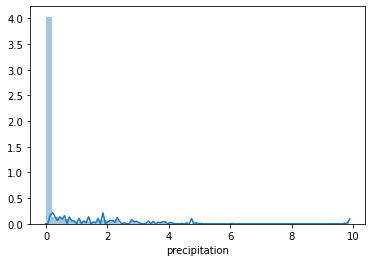

In [6]:
# distribution of precipitation
sns.distplot(train.precipitation)

In [34]:
mask = train[train.precipitation == 0]

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


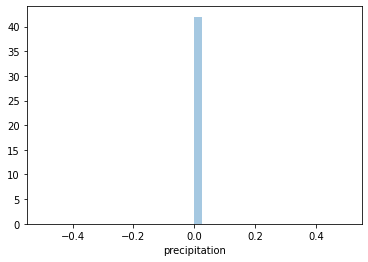

In [35]:
# still weird, but less 0's
# to get a normal dist. we would have to eliminate outliers
sns.distplot(mask.precipitation)

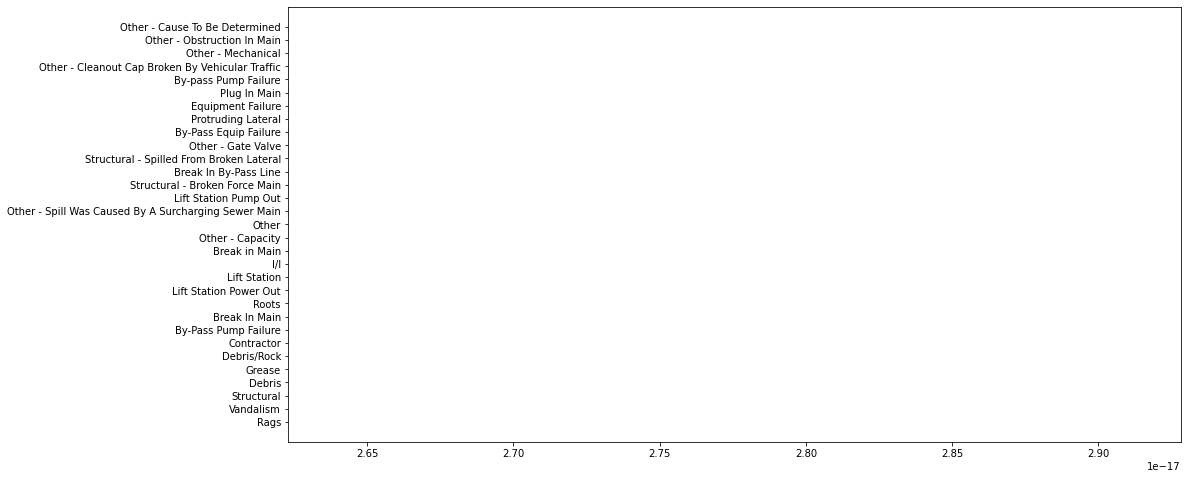

In [36]:
plt.figure(figsize=(16,8))
x = 'precipitation'
y = 'cause'

plt.scatter(y=y, x=x, data=mask)
plt.show()

#### It appears that these are the initially stated causes that happen under higher than normal precipitation
- Lift station
- structural damages
- I/I
- Grease
- Debris
- Debris/Rock

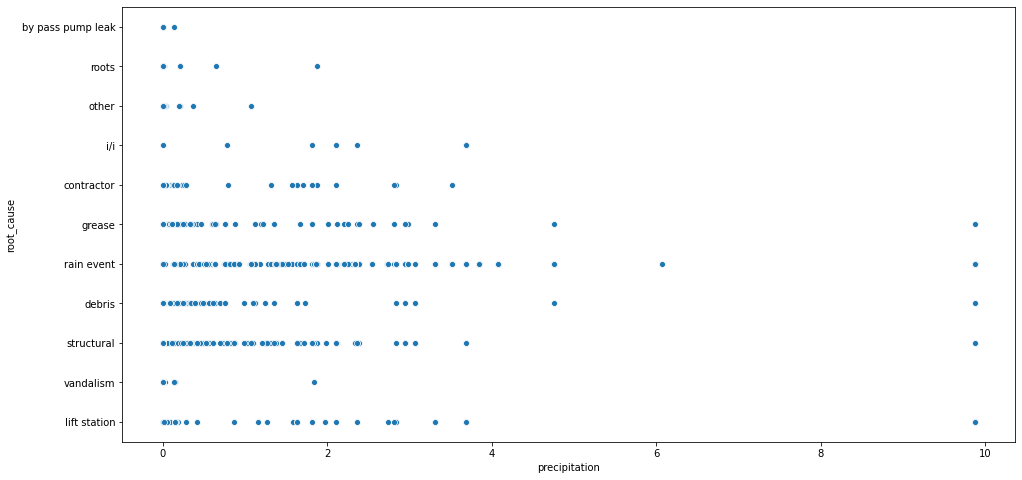

In [10]:
# now lets check root cause against precipitation
plt.figure(figsize=(16,8))
sns.scatterplot(y="root_cause", x="precipitation", data=train)

#### These are the officially determined root issues that are causing damages in high precipitation enviroments
- Rain Event
- Lift Station
- Grease
- Structural
- Debris

### Hypothesis i/i
- $H_0$: Precipitation is not correlated with the cause of the pipe damage involving i/i
- $H_a$: Rainfall is correlated with cause of pipe damage involving i/i

In [37]:
# confidence level = 99%
alpha = 1 - .99
i = mask[train.root_cause == 'i/i'].precipitation
overall_rainfall = mask.precipitation.mean()

t, p = stats.ttest_1samp(i, overall_rainfall)

if p < alpha:
    print(f"We reject the null hypothesis P-value: {p}")
else:
    print(f"We fail to reject the null hypothesis. P-value: {p}")


We fail to reject the null hypothesis. P-value: nan


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Hypothesis grease
- $H_0$: Precipitation is not correlated with the cause of the pipe damage involving grease
- $H_a$: Rainfall is correlated with cause of pipe damage involving grease

In [12]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'grease'].precipitation
overall_rainfall = train.precipitation.mean()

t, p = stats.ttest_1samp(i, overall_rainfall)

if p < alpha:
    print(f"We reject the null hypothesis P-value: {p}")
else:
    print(f"We fail to reject the null hypothesis. P-value: {p}")


We reject the null hypothesis P-value: 6.041108950661502e-20


### Hypothesis structural
- $H_0$: Precipitation is not correlated with the cause of the pipe damage involving structural damages
- $H_a$: Rainfall is correlated with cause of pipe damage involving structural damages

In [13]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'structural'].precipitation
overall_rainfall = train.precipitation.mean()

t, p = stats.ttest_1samp(i, overall_rainfall)

if p < alpha:
    print(f"We reject the null hypothesis P-value: {p}")
else:
    print(f"We fail to reject the null hypothesis. P-value: {p}")


We reject the null hypothesis P-value: 1.7102838954174988e-60


### Are temperature and root cause related?


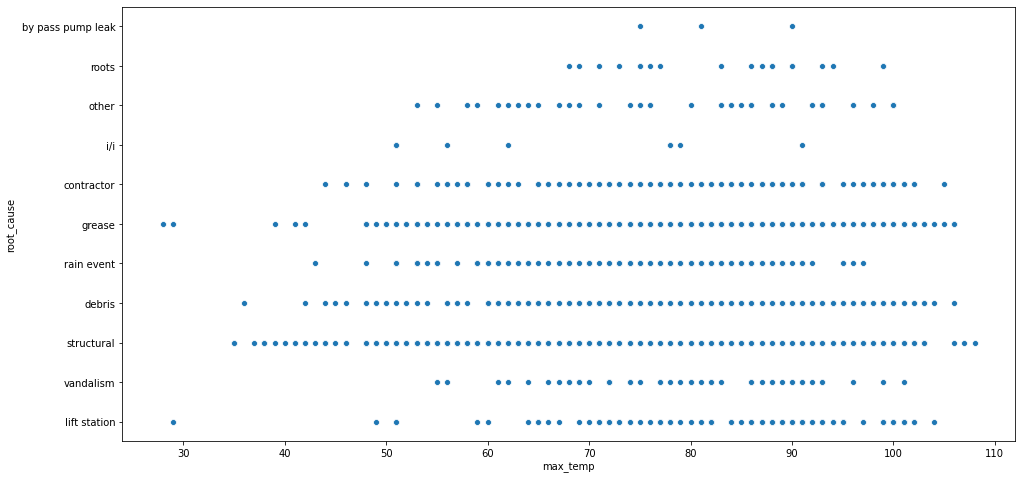

In [14]:
plt.figure(figsize=(16,8))
sns.scatterplot(x="max_temp", y="root_cause", data=train)

#### Doesn't appear so

#### Lets check it out with a bar chart

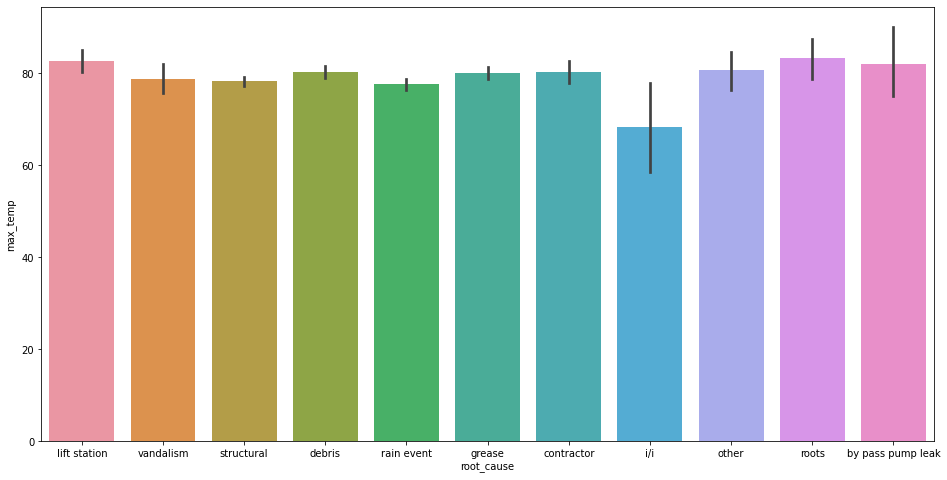

In [15]:
plt.figure(figsize=(16,8))
sns.barplot(x='root_cause', y="max_temp", data=train)

### max temp is normall distributed

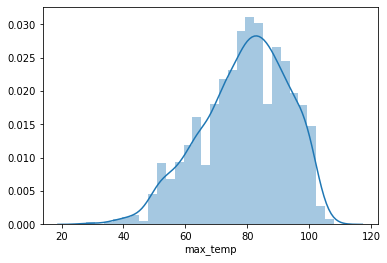

In [16]:
sns.distplot(train.max_temp)

#### now a swarm plot

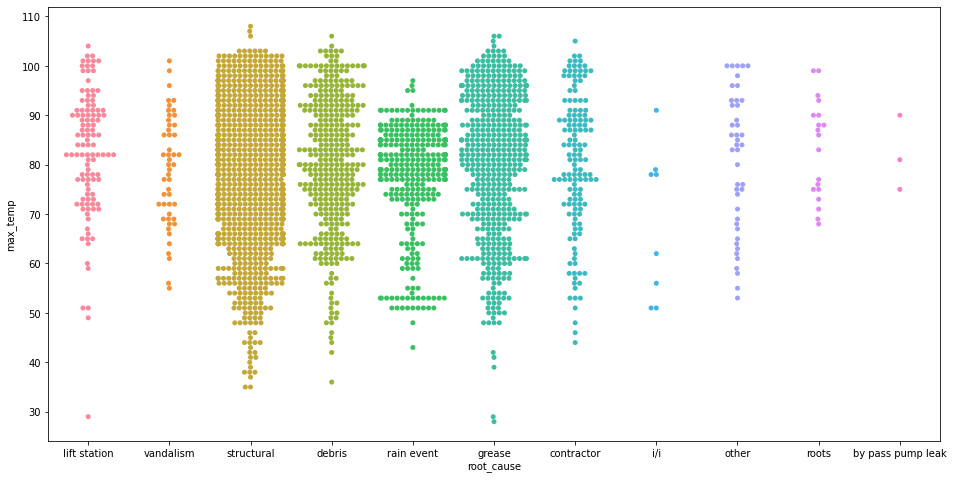

In [17]:
plt.figure(figsize=(16,8))
sns.swarmplot(x='root_cause', y="max_temp", data=train)

### Hypothesis max_temp/grease
- $H_0$: max_temp is not correlated with the root cause of the pipe damage involving grease damages
- $H_a$: max_temp is correlated with the root cause of pipe damage involving grease damages

In [18]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'grease'].max_temp
overall_max_temp = train.max_temp.mean()

t, p = stats.ttest_1samp(i, overall_max_temp)

if p < alpha:
    print(f"We reject the null hypothesis P-value: {p}")
else:
    print(f"We fail to reject the null hypothesis. P-value: {p}")


We fail to reject the null hypothesis. P-value: 0.1564421159023603


### Hypothesis max_temp/debris
- $H_0$: max_temp is not correlated with the root cause of the pipe damage involving debris damages
- $H_a$: max_temp is correlated with the root cause of pipe damage involving debris damages

In [19]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'debris'].max_temp
overall_max_temp = train.max_temp.mean()

t, p = stats.ttest_1samp(i, overall_max_temp)

if p < alpha:
    print(f"We reject the null hypothesis P-value: {p}")
else:
    print(f"We fail to reject the null hypothesis. P-value: {p}")


We fail to reject the null hypothesis. P-value: 0.12488765473905385


### Hypothesis max_temp/rain_event
- $H_0$: max_temp is not correlated with the root cause of the pipe damage involving rain event damages
- $H_a$: max_temp is correlated with the root cause of pipe damage involving rain event damages

In [20]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'rain event'].max_temp
overall_max_temp = train.max_temp.mean()

t, p = stats.ttest_1samp(i, overall_max_temp)

if p < alpha:
    print(f"We reject the null hypothesis P-value: {p}")
else:
    print(f"We fail to reject the null hypothesis. P-value: {p}")


We fail to reject the null hypothesis. P-value: 0.013746006480003296


### Hypothesis max_temp/structural
- $H_0$: max_temp is not correlated with the root cause of the pipe damage involving structural damages
- $H_a$: max_temp is correlated with the root cause of pipe damage involving structural damages

In [21]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'structural'].max_temp
overall_max_temp = train.max_temp.mean()

t, p = stats.ttest_1samp(i, overall_max_temp)

if p < alpha:
    print(f"We reject the null hypothesis P-value: {p}")
else:
    print(f"We fail to reject the null hypothesis. P-value: {p}")


We fail to reject the null hypothesis. P-value: 0.0437846982890007


## We have statistically proven that max_temp is not correlated with pipe damages in this data set

#### what about low temps?

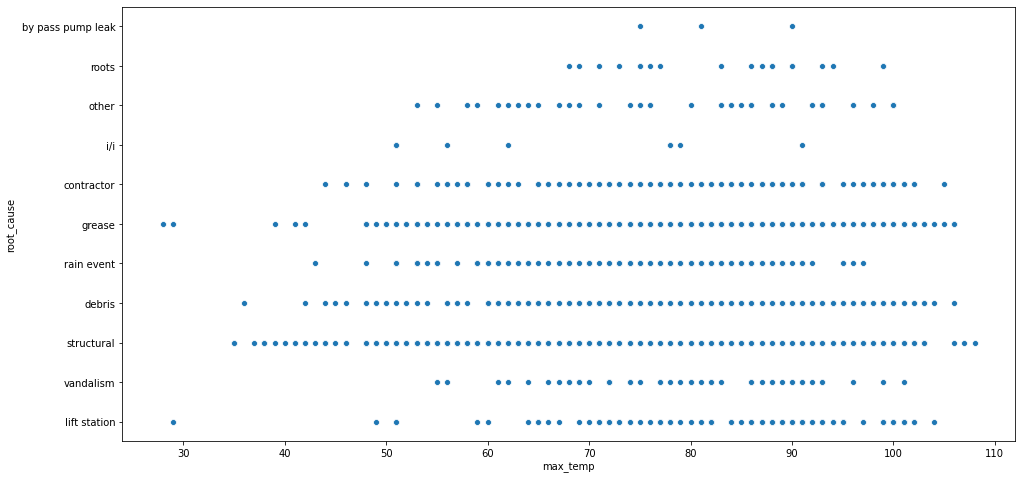

In [22]:
plt.figure(figsize=(16,8))
sns.scatterplot(y="root_cause", x="max_temp", data=train)

### Looks almost exactly the same as max temp

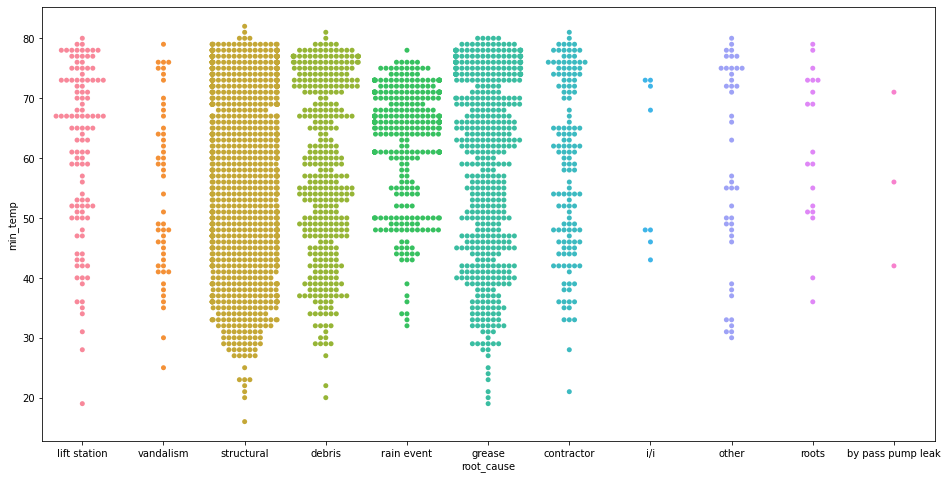

In [23]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="root_cause", y="min_temp", data=train)

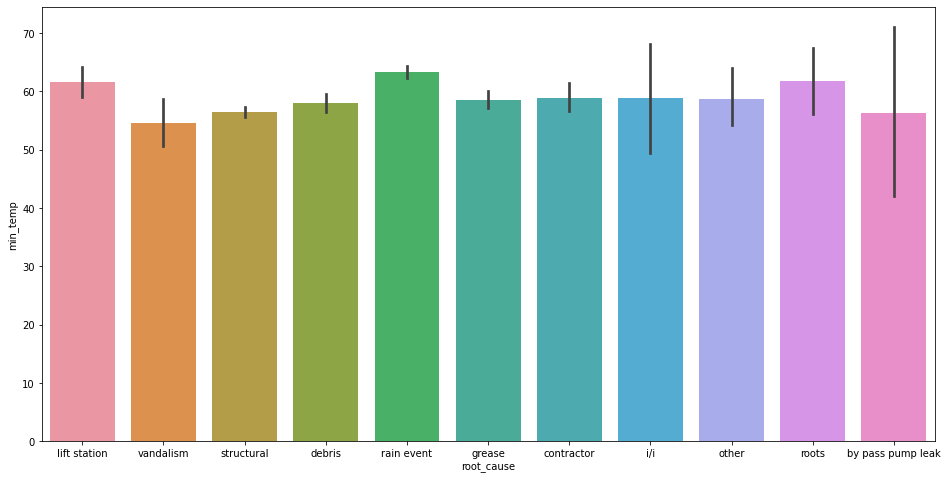

In [24]:
plt.figure(figsize=(16,8))
sns.barplot(x="root_cause", y="min_temp", data=train)

### Hypothesis min_temp/grease
- $H_0$: min_temp is not correlated with the root cause of the pipe damage involving damages invoked by grease
- $H_a$: min_temp is correlated with the root cause of pipe damage involving damages invoked by grease

In [25]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'grease'].min_temp
overall_min_temp = train.min_temp.mean()

t, p = stats.ttest_1samp(i, overall_min_temp)

if p < alpha:
    print(f"We reject the null hypothesis P-value: {p}")
else:
    print(f"We fail to reject the null hypothesis. P-value: {p}")


We fail to reject the null hypothesis. P-value: 0.7387280777411416


### Hypothesis min_temp/structural
- $H_0$: min_temp is not correlated with the root cause of the pipe damage involving structural damages
- $H_a$: min_temp is correlated with the root cause of pipe damage involving structural damages

In [26]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'structural'].min_temp
overall_min_temp = train.min_temp.mean()

t, p = stats.ttest_1samp(i, overall_min_temp)

if p < alpha:
    print(f"We reject the null hypothesis P-value: {p}")
else:
    print(f"We fail to reject the null hypothesis. P-value: {p}")


We reject the null hypothesis P-value: 8.584672608341485e-05


### maybe average temp will yield more insights

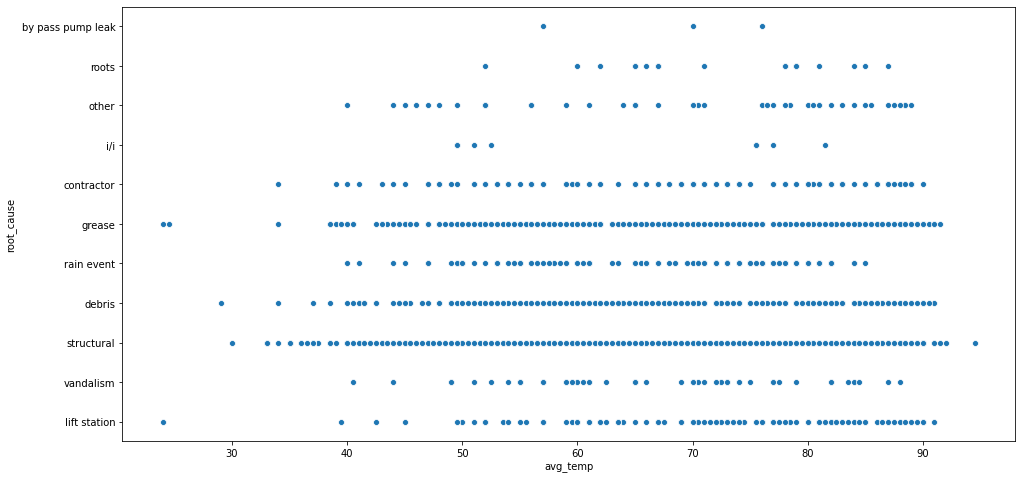

In [27]:
plt.figure(figsize=(16,8))
sns.scatterplot(y="root_cause", x="avg_temp", data=train)

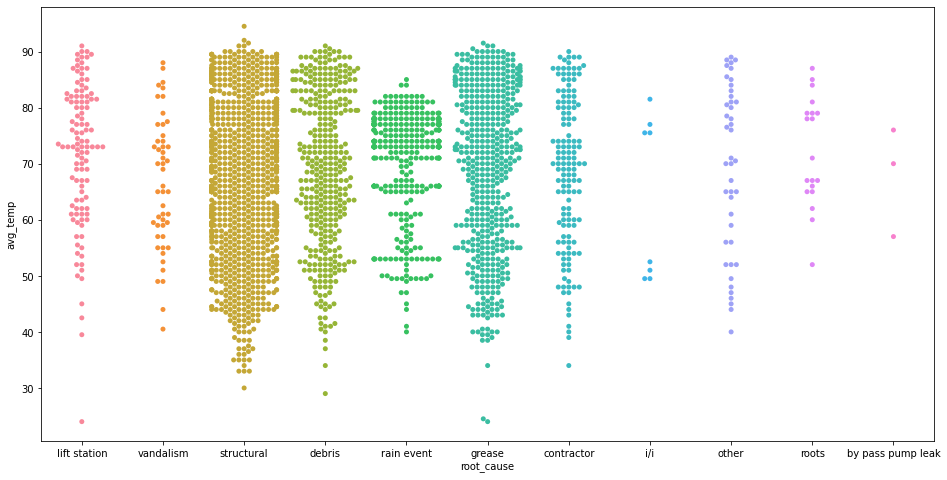

In [28]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="root_cause", y="avg_temp", data=train)

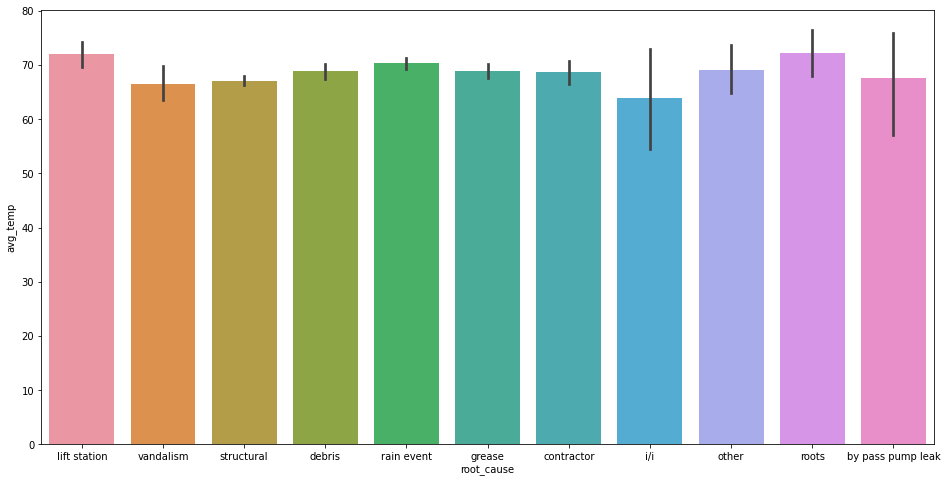

In [29]:
plt.figure(figsize=(16,8))
sns.barplot(x="root_cause", y="avg_temp", data=train)

### Hypothesis avg_temp/lift station
- $H_0$: min_temp is not correlated with the root cause of the pipe damage involving lift stations
- $H_a$: min_temp is correlated with the root cause of pipe damage involving lift stations

In [30]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'lift station'].avg_temp
overall_avg_temp = train.avg_temp.median()

t, p = stats.ttest_1samp(i, overall_avg_temp)

if p < alpha:
    print(f"We reject the null hypothesis P-value: {p}")
else:
    print(f"We fail to reject the null hypothesis. P-value: {p}")


We fail to reject the null hypothesis. P-value: 0.22983690468358783


### Hypothesis avg_temp/structural
- $H_0$: min_temp is not correlated with the root cause of the pipe damage involving structural root causes
- $H_a$: min_temp is correlated with the root cause of pipe damage involving structural root causes

In [31]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'structural'].avg_temp
overall_avg_temp = train.avg_temp.median()

t, p = stats.ttest_1samp(i, overall_avg_temp)

if p < alpha:
    print(f"We reject the null hypothesis P-value: {p}")
else:
    print(f"We fail to reject the null hypothesis. P-value: {p}")


We reject the null hypothesis P-value: 1.5574785405415725e-13


#### What is 'Other', I wonder how many observations there are?

In [32]:
train.groupby("root_cause").count()

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code,precipitation,snowfall,snow_depth,avg_temp,max_temp,min_temp,foggy,heavy_fog,thunder,hail,blowing_snow,rain,precipitation_rolling_7,precipitation_rolling_14,precipitation_rolling_30,avg_temp_rolling_7,avg_temp_rolling_14,avg_temp_rolling_30,max_temp_rolling_7,max_temp_rolling_14,max_temp_rolling_30,min_temp_rolling_7,min_temp_rolling_14,min_temp_rolling_30
root_cause,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
by pass pump leak,3,3,3,3,3,1,3,3,3,3,0,3,3,2,2,3,3,1,3,3,3,2,1,1,1,1,3,3,3,3,3,3,2,3,0,3,3,3,3,3,3,3,0,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
contractor,139,139,139,139,139,120,139,139,139,139,106,139,139,138,121,138,132,95,139,139,139,124,124,124,124,118,125,125,136,139,139,139,135,138,20,114,114,139,139,139,139,139,20,139,136,100,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139
debris,365,365,365,365,365,333,365,365,365,365,356,362,365,365,361,365,230,336,365,365,365,151,363,363,363,360,283,283,356,365,365,365,364,365,103,86,86,365,365,365,365,365,103,365,356,252,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365
grease,489,489,489,489,489,464,489,489,489,489,478,489,489,489,482,489,391,465,489,489,489,291,487,487,487,481,423,423,482,489,489,489,489,489,186,185,185,489,489,489,489,489,186,489,482,364,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489
i/i,8,8,8,8,8,7,8,8,8,8,8,8,8,8,7,8,2,8,8,8,8,2,8,8,8,8,8,8,8,8,8,8,8,8,6,0,0,8,8,8,8,8,6,8,8,2,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
lift station,111,111,111,111,111,25,111,111,111,111,87,111,111,111,9,110,71,61,111,111,111,98,10,10,10,100,93,90,108,111,111,111,109,111,0,27,27,111,111,111,111,111,0,111,108,71,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111
other,43,43,43,43,43,35,43,43,43,43,32,43,43,43,37,43,40,38,43,43,43,32,41,41,41,41,43,42,43,43,43,43,42,43,15,21,21,43,43,43,43,43,15,43,43,31,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
rain event,326,326,326,326,326,224,326,326,323,326,66,326,326,326,301,325,298,286,326,326,326,290,312,312,312,316,307,281,326,326,326,326,324,326,55,269,269,326,326,326,326,326,55,326,326,188,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326
roots,19,19,19,19,19,18,19,19,19,19,18,19,19,19,18,19,19,17,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,10,11,11,19,19,19,19,19,10,19,19,12,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19


### 43 observations

In [33]:
mask2 = train[train.root_cause == 'other']
mask2['cause']

2496                                 By-Pass Pump Failure
1173                                           Structural
304                                                 Other
773                                      Other - Capacity
2111                                                Other
354     Other - Spill Was Caused By A Surcharging Sewe...
2175                                           Broken ARV
1448                                           Structural
1939                                                Other
799                                                Debris
738                                                 Other
1584                                               Debris
2502                                By-Pass Equip Failure
1228                                           Contractor
600                                                 Other
1652                                               Debris
1492                                               Debris
1265          

In [ ]:
parties_of_2 = tips[tips['size'] == 2]
parties_of_4 = tips[tips['size'] == 4]
test_results = stats.ttest_ind(parties_of_2.tip, parties_of_4.tip)
test_results

### does wether or not it rained effect root cause

In [40]:
train['rain'] = train[train.precipitation > 0] == 1

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
train.head()

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code,precipitation,snowfall,snow_depth,avg_temp,max_temp,min_temp,foggy,heavy_fog,thunder,hail,blowing_snow,rain,precipitation_rolling_7,precipitation_rolling_14,precipitation_rolling_30,avg_temp_rolling_7,avg_temp_rolling_14,avg_temp_rolling_30,max_temp_rolling_7,max_temp_rolling_14,max_temp_rolling_30,min_temp_rolling_7,min_temp_rolling_14,min_temp_rolling_30
2886,1265,2009-10-25,6305,CAGNON RD,1000,NaN,2009-10-25 18:00:00,2009-10-25 20:00:00,2.000000,Rags,APPLIED HTH,REMOVED RAGS FROM PUMPS,MEDIO CREEK,LS200,NaN,GROUND,NaN,NaN,10,2009,44,0.0,NaN,NaN,NaN,1994.0,NaN,NaN,CAGNON RD 055/1,13,2.0,2009-07-17 00:00:00,ABOVE,Sewer Lift Station,NaN,NaN,NaT,False,lift station,0.0,0.0,0.0,0.0,NaN,"(250, 1000]","CAGNON RD 055/1,SAN ANTONIO,Texas,USA",NaN,None,0.00,0.0,0.0,73.5,84,63,0,0,0,0,0,NaN,0.297143,0.171429,0.336333,67.785714,69.678571,72.866667,79.142857,80.142857,81.800000,56.428571,59.214286,63.933333
1549,2953,2012-12-18,5602,SUNKIST,18000,0.0,2012-12-18 07:04:00,2012-12-18 12:30:00,5.433333,Vandalism,AREA CLEANED AND DISINFECTED,CLEANED MAIN,LEON CREEK,46769,46768,CREEK BED,ZARZAMORA CREEK,7.0,12,2012,51,0.0,8.0,235.00,HDPE,2011.0,0.00,0.05,5602 Sunkist,1,0.0,0,GRAVITY,Sewer Main,2012-12-04 00:00:00,NaN,NaT,False,vandalism,0.0,0.0,0.0,0.0,14.0,"(5000, 50000]","5602 Sunkist,SAN ANTONIO,Texas,USA","5602, Sunkist, San Antonio, Bexar County, Texa...",78228,0.00,0.0,0.0,61.0,81,41,1,0,0,0,0,NaN,0.010000,0.005714,0.011667,57.285714,58.250000,61.200000,70.571429,70.571429,72.600000,44.000000,45.928571,49.800000
1045,3531,2015-01-16,3714,TRAVIS W,100,0.0,2015-01-16 11:01:00,2015-01-16 12:45:00,1.733333,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,Cleaned Main,DOS RIOS,900697,16293,ALLEY,None,5.0,1,2015,3,0.0,8.0,187.00,CT,1927.0,0.00,NaN,3714 W Travis,1,1.0,0,GRAVITY,Sewer Main,2013-12-12 13:34:00,29.0,2015-01-16 11:30:00,False,structural,0.0,0.0,0.0,0.0,399.0,"(50, 250]","3714 W Travis,SAN ANTONIO,Texas,USA","West Travis, Dublin, Erath County, Texas, 7644...",76446,0.00,0.0,0.0,48.0,64,36,0,0,0,0,0,NaN,0.051429,0.059286,0.056667,42.142857,43.071429,46.966667,51.000000,52.642857,55.533333,37.000000,35.571429,39.700000
2062,2438,2011-08-21,4202,SWAN FOREST,7,0.0,2011-08-21 14:00:00,2011-08-21 15:30:00,1.500000,Debris,APPLIED HTH,CLEANED MAIN,SALADO CREEK,59538,44902,STREET,SALADO CREEK,3.0,8,2011,35,NaN,8.0,202.98,PVC,1998.0,0.00,0.00,4202 Swan Forest,1,0.0,0,GRAVITY,Sewer Main,2010-10-23 00:00:00,NaN,NaT,False,debris,0.0,0.0,0.0,0.0,302.0,"(0, 15]","4202 Swan Forest,SAN ANTONIO,Texas,USA","4202, Swan Forest, Pecan Valley Heights, Boldt...",78222,0.00,0.0,0.0,89.0,100,78,0,0,0,0,0,NaN,0.000000,0.000000,0.000667,89.285714,89.785714,89.550000,101.000000,101.000000,100.900000,77.571429,78.571429,78.200000
1691,2808,2012-06-17,3519,GRANT AVE,50,0.0,2012-06-17 15:53:00,2012-06-17 16:20:00,0.450000,Grease,APPLIED HTH,CLEANED MAIN,DOS RIOS,4096,77250,STREET,None,1.0,6,2012,25,0.0,8.0,211.00,CP,1977.0,0.01,0.00,3519 GRANT AVE,2,0.0,0,GRAVITY,Sewer Main,2011-10-15 00:00:00,NaN,NaT,False,structural,0.0,0.0,0.0,0.0,246.0,"(15, 50]","3519 GRANT AVE,SAN ANTONIO,Texas,USA","3519, Grant Avenue, Keystone Park, San Antonio...",78201,0.01,0.0,0.0,82.5,94,71,0,0,1,0,0,False,0.001429,0.000714,0.000333,85.928571,84.535714,82.833333,96.571429,94.857143,92.533333,75.285714,74.214286,73.133333


In [49]:
train.rain

2886      NaN
1549      NaN
1045      NaN
2062      NaN
1691    False
        ...  
2154      NaN
3089      NaN
1766      NaN
1122      NaN
1346      NaN
Name: rain, Length: 2546, dtype: object

In [48]:
contingency_table = pd.crosstab(train.rain, train.root_cause)
contingency_table

root_cause,by pass pump leak,contractor,debris,grease,i/i,lift station,other,rain event,roots,structural,vandalism
rain,,,,,,,,,,,
False,1,29,76,88,7,37,8,292,6,209,5


In [44]:
test_results = stats.chi2_contingency(contingency_table)
test_results

(0.0, 1.0, 0, array([[  1.],
        [ 29.],
        [ 76.],
        [ 88.],
        [  7.],
        [ 37.],
        [  8.],
        [292.],
        [  6.],
        [209.],
        [  5.]]))

In [45]:
_, p, _, expected = test_results

In [46]:
p

1.0

In [ ]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'structural'].max_temp
o = train[train.]
overall_max_temp = train.max_temp.mean()

t, p = stats.ttest_1samp(i, overall_max_temp)

if p < alpha:
    print(f"We reject the null hypothesis P-value: {p}")
else:
    print(f"We fail to reject the null hypothesis. P-value: {p}")
